In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu

In [4]:
## Đọc file
df = pd.read_csv('retail_clean.csv')

In [5]:
## Kiểm tra thông tin cơ bản
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [6]:
## chuyển đổi kiểu dữ liệu trường 'InvoiceDate'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
## chuyển đổi kiểu dữ liệu 'Date'
df['Date'] = df['InvoiceDate'].dt.date
df['Date'] =pd.to_datetime(df['Date'])

## tính recency

In [8]:
## lấy ngày lớn nhất
max_date = df['Date'].max()

In [9]:
## nhóm KH và xem ngày mua hàng cuối cùng

customers_recency = df.groupby('Customer ID').agg(last_date = ('Date', 'max')).reset_index()
customers_recency['recency'] = (max_date - customers_recency['last_date'])
customers_recency['recency'] = customers_recency['recency'].astype('string').str.replace(' days','')
customers_recency['recency'] = customers_recency['recency'].astype('int')


In [91]:
## OUTPUT - gồm 3 trường
### chứa thông tin ID KH
### ngày mua hàng gần nhất (so với max date)
### đếm số ngày kể từ ngày mua hàng lần nhất

customers_recency

,Customer ID,last_date,recency,rank_recency
0,12346.0,2011-01-18,325,0.289832
1,12347.0,2011-12-07,2,0.968968
2,12348.0,2011-09-25,75,0.542085
3,12349.0,2011-11-21,18,0.807941
4,12350.0,2011-02-02,310,0.300884
...,...,...,...,...
5876,18283.0,2011-12-06,3,0.953324
5877,18284.0,2010-10-04,431,0.168764
5878,18285.0,2010-02-17,660,0.032903
5879,18286.0,2010-08-20,476,0.131440


In [11]:
customers_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer ID  5881 non-null   float64       
 1   last_date    5881 non-null   datetime64[ns]
 2   recency      5881 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 115.0 KB


## tính frequency

In [133]:
## sử dụng group by để đếm số hóa đơn theo từng ID riêng biệt
## OUTPUT: gồm 2 trường
### thông tin KH (customer ID)
### tổng số lần mua hàng (frequency)
freq1 = df.groupby(['Customer ID', 'Invoice']).agg(count = ('Description', 'count')).reset_index()

freq2 = freq1.groupby('Customer ID').agg(frequency =('count', 'count')).reset_index()
freq2

,Customer ID,frequency
0,12346.0,12
1,12347.0,8
2,12348.0,5
3,12349.0,4
4,12350.0,1
...,...,...
5876,18283.0,22
5877,18284.0,1
5878,18285.0,1
5879,18286.0,2


## tính monetary

In [134]:
## Sử dụng group by để tổng (SUM) hợp doanh thu từng hóa đơn, của từng KH
## OUTPUT
### thông tin KH (Custoemr ID)
### số hóa đơn, ID voice - Invoice
### doanh số - revenue

mone1 = df.groupby(['Customer ID','Invoice']).agg(revenue = ('Revenue','sum')).reset_index()
mone1 

,Customer ID,Invoice,revenue
0,12346.0,491725,45.00
1,12346.0,491742,22.50
2,12346.0,491744,22.50
3,12346.0,492718,22.50
4,12346.0,492722,1.00
...,...,...,...
36970,18287.0,523290,30.60
36971,18287.0,534346,381.50
36972,18287.0,554065,765.28
36973,18287.0,570715,1001.32


In [135]:
## sử dụng group by và mean để tính trung bình giá trị hóa đơn của từng KH
## OUTPUT
### thông tin KH (customer ID)
### doanh thu trung bình - monetary

mone2 = mone1.groupby('Customer ID').agg(monetary = ('revenue','mean')).reset_index()
mone2

,Customer ID,monetary
0,12346.0,6463.038333
1,12347.0,615.191250
2,12348.0,403.880000
3,12349.0,1107.172500
4,12350.0,334.400000
...,...,...
5876,18283.0,121.131818
5877,18284.0,461.680000
5878,18285.0,427.000000
5879,18286.0,648.215000


## ranking

In [ ]:
## Xếp hạng KH dựa trên 'recency' ngày mua hàng gần nhất

## OUTPUT
### biến customer_recency
### xếp loại vị trí tính theo recency
### điều kiện recency càng nhỏ (lần mua hàng cuối gần) (1,2,3) rank càng gần với 0.0001
### recency càng lớn (lần mua hàng cuối xa) rank càng gần với 1

customers_recency['rank_recency'] = customers_recency['recency'].rank(ascending = True, pct=True)
customers_recency


,Customer ID,last_date,recency,rank_recency
0,12346.0,2011-01-18,325,0.710338
1,12347.0,2011-12-07,2,0.031202
2,12348.0,2011-09-25,75,0.458085
3,12349.0,2011-11-21,18,0.192229
4,12350.0,2011-02-02,310,0.699286
...,...,...,...,...
5876,18283.0,2011-12-06,3,0.046846
5877,18284.0,2010-10-04,431,0.831406
5878,18285.0,2010-02-17,660,0.967267
5879,18286.0,2010-08-20,476,0.868730


In [ ]:
## xếp hạng customer theo Tần xuất mua hàng
## OUTPUT:
### bảng frequency
### (thêm cột) xếp hạng theo tần xuất mua hàng
### Điều kiện frequency càng lớn (nhiều lần mua hàng) rank càng gân 0.001
### Frequency càng nhỏ (số lần mua hàng ít) rank càng gần về 1

freq2['frequency_ranking'] = freq2['frequency'].rank(ascending=False , pct= True)
freq2.head(15)

,Customer ID,frequency,frequency_ranking
0,12346.0,12,0.118602
1,12347.0,8,0.206427
2,12348.0,5,0.336932
3,12349.0,4,0.408859
4,12350.0,1,0.861843
5,12351.0,1,0.861843
6,12352.0,10,0.157371
7,12353.0,2,0.643343
8,12354.0,1,0.861843
9,12355.0,2,0.643343


In [ ]:
## xếp hạng customer ID theo giá trị đơn hàng

## OUTPUT
### bảng customer_monery
### (thêm cột) xếp hạng KH theo giá trị đơn hàng
### điều kiện monetary càng lớn, rank càng về gân 0.001
### monetary càng nhỏ, rank càng gần về 1

mone2['monetary_ranking'] = mone2['monetary'].rank(ascending=False , pct=True)
mone2

,Customer ID,monetary,monetary_ranking
0,12346.0,6463.038333,0.001530
1,12347.0,615.191250,0.106104
2,12348.0,403.880000,0.263051
3,12349.0,1107.172500,0.028567
4,12350.0,334.400000,0.375446
...,...,...,...
5876,18283.0,121.131818,0.892365
5877,18284.0,461.680000,0.199456
5878,18285.0,427.000000,0.235504
5879,18286.0,648.215000,0.095732


## combine data

In [159]:
## kết hợp 3 bảng 
## OUTPUT
### chứa thông tin KH
### Recency - ngày mua hàng gần nhất, khoảng cách ngày mua hàng gần nhất (so với max day), xếp hạng theo recency
### Frequency - số lần mua hàng, xếp hạng theo số lần mua hàng
### Monetary - Trung bình tổng giá trị hóa đơn, xếp hạng theo trung bình tổng giá trị hóa đơn
all_data = pd.merge(customers_recency, freq2, 
                    how = 'left', 
                    on= 'Customer ID'
                    )   
all_data = pd.merge(all_data , mone2,
                    how = 'left',
                    on = 'Customer ID')

In [160]:
all_data

,Customer ID,last_date,recency,rank_recency,frequency,frequency_ranking,monetary,monetary_ranking
0,12346.0,2011-01-18,325,0.710338,12,0.118602,6463.038333,0.001530
1,12347.0,2011-12-07,2,0.031202,8,0.206427,615.191250,0.106104
2,12348.0,2011-09-25,75,0.458085,5,0.336932,403.880000,0.263051
3,12349.0,2011-11-21,18,0.192229,4,0.408859,1107.172500,0.028567
4,12350.0,2011-02-02,310,0.699286,1,0.861843,334.400000,0.375446
...,...,...,...,...,...,...,...,...
5876,18283.0,2011-12-06,3,0.046846,22,0.045315,121.131818,0.892365
5877,18284.0,2010-10-04,431,0.831406,1,0.861843,461.680000,0.199456
5878,18285.0,2010-02-17,660,0.967267,1,0.861843,427.000000,0.235504
5879,18286.0,2010-08-20,476,0.868730,2,0.643343,648.215000,0.095732


## phân nhóm - categorying

In [161]:
bins = [0,0.35,0.75,1]
names = ['1' , '2', '3']

In [162]:
finall = pd.DataFrame(customers_recency['Customer ID'])

In [ ]:
## tạo phân loại theo điều kiện
## 1: tốt, 2 - trung bình, 3 - không tốt
## xếp hạng < 0.35 >> phân loại 1
#3 xêp hạng 0.35 > 075 phân loại 2
## xếp hạng > 0.75 >> phân loại 2

finall['recency'] = pd.cut(customers_recency['rank_recency'] , bins, labels= names)
finall['frequence'] = pd.cut(freq2['frequency_ranking'] , bins, labels= names)
finall['monetary'] = pd.cut(mone2['monetary_ranking'] , bins, labels= names)

In [ ]:
##
finall

,Customer ID,recency,frequence,monetary
0,12346.0,2,1,1
1,12347.0,1,1,1
2,12348.0,2,1,1
3,12349.0,1,2,1
4,12350.0,2,3,2
...,...,...,...,...
5876,18283.0,1,1,3
5877,18284.0,3,3,1
5878,18285.0,3,3,1
5879,18286.0,3,2,1


## finalize data

In [167]:
## merge với biến 'all_data'

##OUTPUT
### biến all_date
### thêm trường phân nhóm (121,122,112,..)

all_data['Categories'] =  finall['recency'].astype('string') + finall['frequence'].astype('str') + finall['monetary'].astype('string')
all_data

,Customer ID,last_date,recency,rank_recency,frequency,frequency_ranking,monetary,monetary_ranking,Categories
0,12346.0,2011-01-18,325,0.710338,12,0.118602,6463.038333,0.001530,211
1,12347.0,2011-12-07,2,0.031202,8,0.206427,615.191250,0.106104,111
2,12348.0,2011-09-25,75,0.458085,5,0.336932,403.880000,0.263051,211
3,12349.0,2011-11-21,18,0.192229,4,0.408859,1107.172500,0.028567,121
4,12350.0,2011-02-02,310,0.699286,1,0.861843,334.400000,0.375446,232
...,...,...,...,...,...,...,...,...,...
5876,18283.0,2011-12-06,3,0.046846,22,0.045315,121.131818,0.892365,113
5877,18284.0,2010-10-04,431,0.831406,1,0.861843,461.680000,0.199456,331
5878,18285.0,2010-02-17,660,0.967267,1,0.861843,427.000000,0.235504,331
5879,18286.0,2010-08-20,476,0.868730,2,0.643343,648.215000,0.095732,321


# Trực quan hóa dữ liệu - Insights và Đề xuất

In [146]:
import seaborn as sns

In [150]:
sorted_order = sorted(all_data['Categories'])
sorted_order

['111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',
 '111',


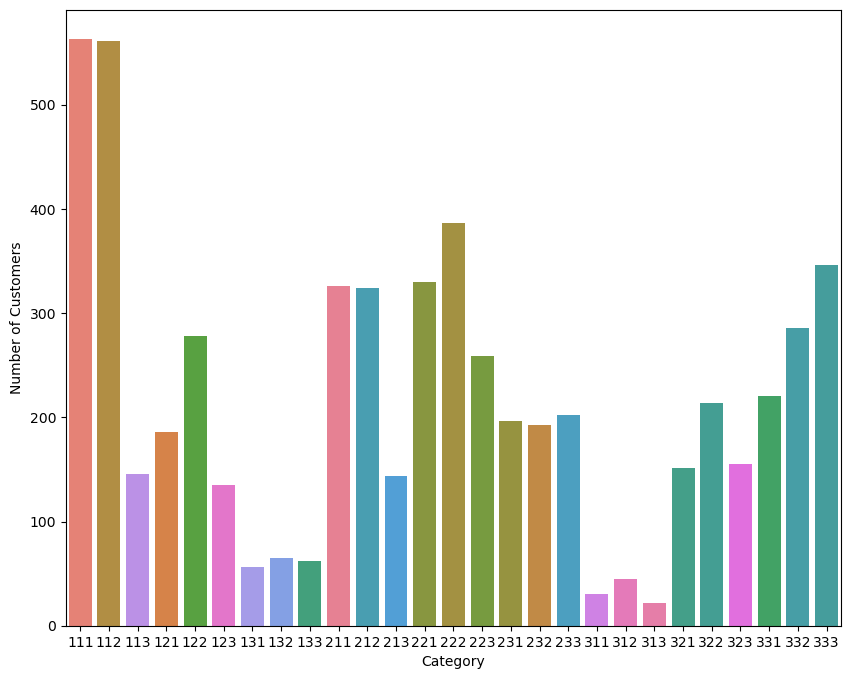

In [169]:
plt.figure(figsize=(10, 8)) 
fig = sns.countplot(
        x = 'Categories', 
        data=all_data,
        hue = 'Categories',
       order = sorted_order
            )
plt.ylabel('Number of Customers')
plt.xlabel('Category')
plt.show()
                    

# Kết luận

In [ ]:
## bằng việc sử dụng phân tích RFM có thể ứng dụng trong việc đo lường sức khỏe doanh nghiệp 
## (sức khỏe DN ở bài tập trên khá tốt, do có khoảng 1/3 KH trung thành và chi tiêu nhiều), 
## đặc biệt là tiềm năng khai thác lớn từ nhóm KH số '2'

## Việc sử dụng RFM cũng hữu ích trong việc đưa ra các chiến lược phù hợp cho từng nhóm đối tượng 
### duy trì, giữ chân nhóm KH 3
### khai thác tối đa lợi nhuận nhóm KH 2
### tìm hiểu, dự báo 1 số nguyên nhân KH rời đi - nhóm KH 1

In [154]:
df = pd.read_csv('rfm_revised.csv')
df.head()

,Unnamed: 0,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,rec_freq_monet
0,0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333,0.001530,321
1,1,12347.0,2011-12-07,2,0.031202,222,0.153715,615.191250,0.106104,111
2,2,12348.0,2011-09-25,75,0.458085,51,0.505951,403.880000,0.263051,221
3,3,12349.0,2011-11-21,18,0.192229,175,0.197585,1107.172500,0.028567,111
4,4,12350.0,2011-02-02,310,0.699286,17,0.790342,334.400000,0.375446,231


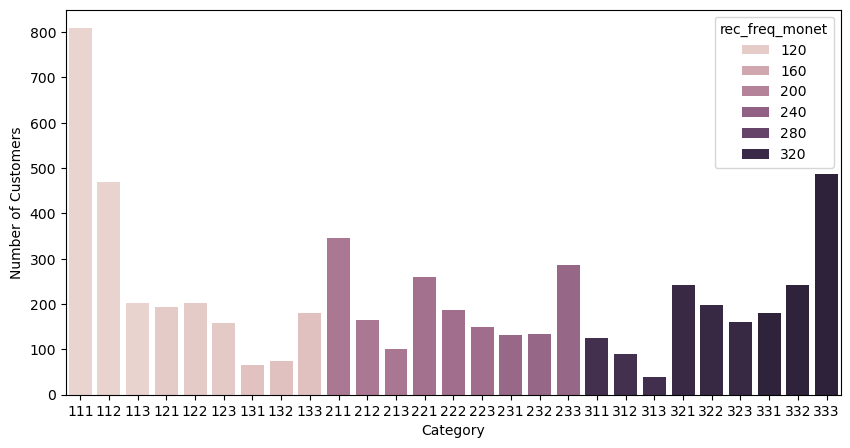

In [155]:
plt.figure(figsize=(10, 5)) 
fig = sns.countplot(
        x = 'rec_freq_monet', 
        data=df,
        hue = 'rec_freq_monet',
       order = sorted_order
            )
plt.ylabel('Number of Customers')
plt.xlabel('Category')
plt.show()